In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import torch
import tensorflow as tf
from torch import nn

DATA_DIR = "../../data/dss/"
CHAR_DATA_DIR = DATA_DIR + "monkbrill/"
IMG_DATA_DIR = DATA_DIR + "train-imgs/"

(2706,)
[ 511  512  579 ... 2269 2270 2271]
[ 493  494  495 ... 3070 3071 3074]
[0 0 0 ... 0 0 0]
(2016,)
<class 'numpy.uint32'>
<class 'numpy.uint32'>


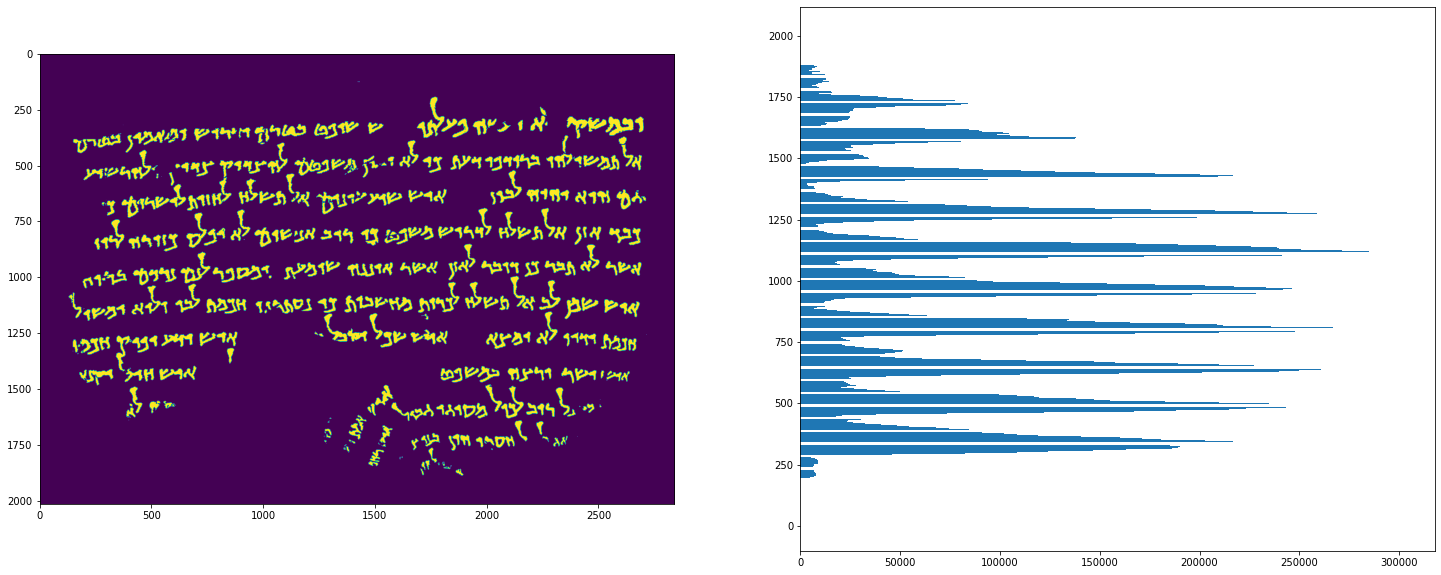

In [41]:
img_path = IMG_DATA_DIR + "P123-Fg002-R-C01-R01-binarized.jpg"

img = None

img = cv.threshold(cv.imread(img_path, 0), 127, 255, cv.THRESH_BINARY_INV)[1]
pad = 128
thresh = 256
row_hist = np.sum(img, axis=1)
inked_rows = np.array(range(img.shape[0]))[row_hist > thresh]
inked_cols = np.array(range(img.shape[1]))[np.sum(img, axis=0) > thresh]
row_range = inked_rows[0] - pad, inked_rows[-1] + pad
col_range = inked_cols[0] - pad, inked_cols[-1] + pad
print(np.shape(row_hist))
row_hist = row_hist[row_range[0]:row_range[1]]
img = img[row_range[0]:row_range[1], col_range[0]:col_range[1]]
empty_rows = np.array(range(len(row_hist)))[row_hist < 0]
print(inked_rows)
print(inked_cols)
print(row_hist)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax[0].imshow(img)
# bar_x = list(range(inked_rows[-1] - inked_rows[0]))
# print(np.shape(bar_x))
print(np.shape(row_hist))
print(type(row_hist[0]))
print(type(np.array(range(len(row_hist)), dtype=np.uint32)[0]))
ax[1].barh(np.array(range(len(row_hist)), dtype=np.uint32), row_hist)
# plt.imshow(img)
plt.show()

In [42]:
def find_valleys(row_hist, window_size=50, height_diff=20000):
  valleys = []
  valley_height = np.inf
  valley_idx = 0
  peak_height = 0
  in_valley = True
  
  for row in range(len(row_hist) - window_size):
    height = np.mean(row_hist[row : row + window_size])
    # print(row_hist[row])
    if in_valley and height > valley_height + height_diff:
      # print(1)
      in_valley = False
      valley_height = np.inf
      valleys.append(valley_idx + int(window_size / 2))
    
    elif not in_valley and height < peak_height - height_diff:
      # print(2)
      in_valley = True
      peak_height = 0
    
    if in_valley and height < valley_height:
      # print(3)
      valley_height = height
      valley_idx = row
    
    elif not in_valley and height > peak_height:
      # print(4)
      peak_height = height

  return valleys

valleys = find_valleys(row_hist)
print(valleys)
# print(row_hist[0])
    
  

3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


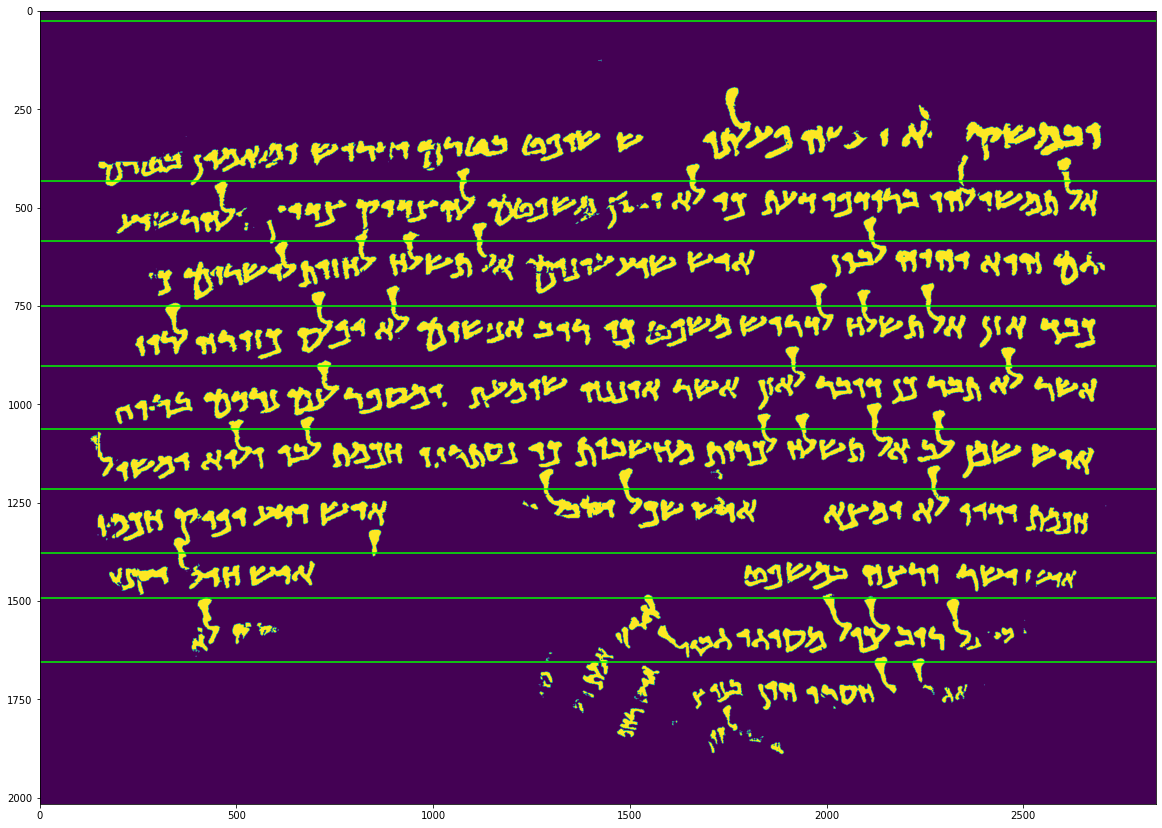

In [43]:
fig = plt.figure(figsize=(20, 30))
# plt.barh(np.array(range(len(row_hist)), dtype=np.uint32), row_hist)
plt.imshow(img)
for v in valleys:
  plt.axhline(v, color='lime')

plt.show()

In [14]:
print(np.shape(img[valleys[1]:valleys[2]]))
print(np.multiply(*np.shape(img[valleys[1]:valleys[2]]))/64**2)
print((np.multiply(*np.shape(img[valleys[1]:valleys[2]]))/105*64)/64**2)

(152, 2837)
105.279296875
64.17023809523809


C:\Users\User\AppData\Local\Temp/ipykernel_17376/398859033.py:9: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax.imshow(line)


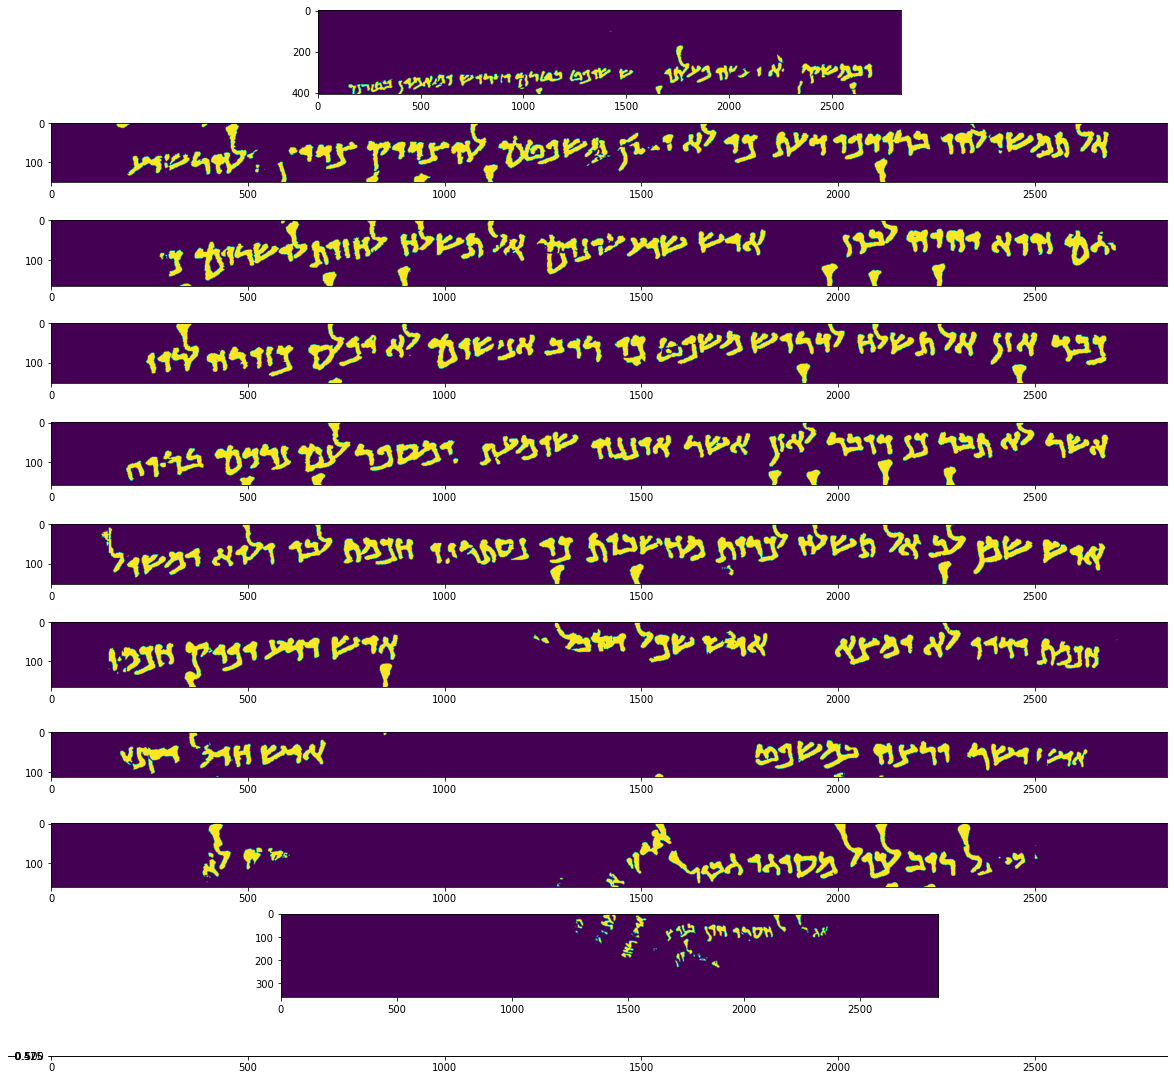

In [17]:
valleys = valleys + [len(img) - 1]
lines = [img[t:b,:] for t, b in zip(valleys, valleys[1:])]

n_lines = len(lines)

fig, axes = plt.subplots(n_lines, 1, figsize=(20, 20))

for ax, line in zip(axes, lines):
  ax.imshow(line)
  
plt.show()

sample_line = lines[2]

8059.3421052631575
[276, 2, 1, 7, 4, 2, 5, 24, 3, 9, 28, 3, 26, 2, 141, 10, 20, 4, 1, 26, 5, 3, 28, 1, 129]


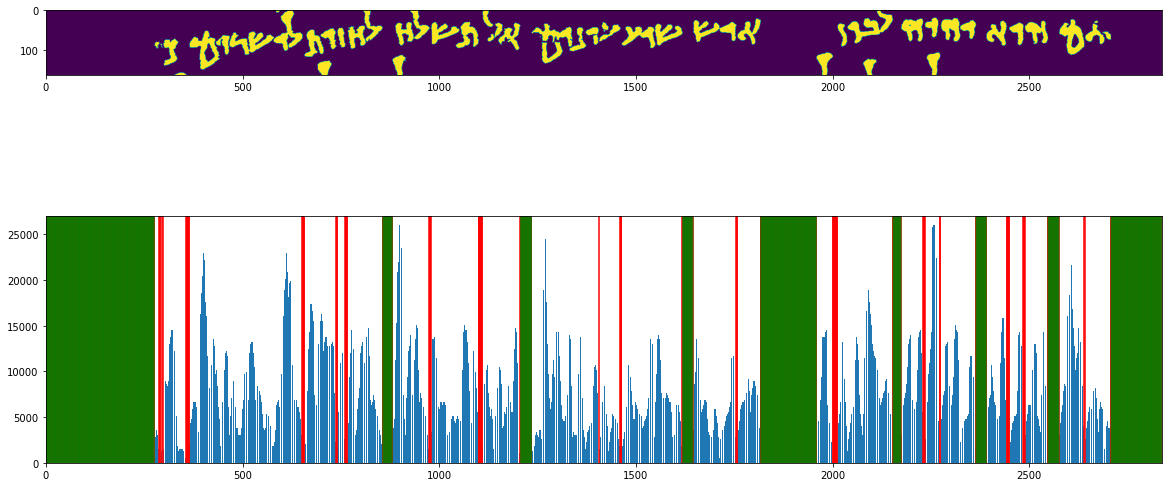

[137.5, 868.5, 1220.5, 1631.5, 1888.0, 2163.5, 2377.5, 2561.5, 2772.0]


In [51]:
col_hist = np.sum(sample_line, axis=0)

fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].imshow(sample_line)
axes[1].bar(np.array(range(len(col_hist)), dtype=np.uint32), col_hist)

mean_col_val = np.mean(list(filter(lambda x: x > 0, col_hist)))
print(mean_col_val)

n_cols = len(col_hist)
prev_i = -1
new_bar = True
blue_bars = []
blue_bar_width = int(n_cols * 0.005)

for i, _ in filter(lambda x: x[1] < 0.01 * mean_col_val, zip(range(len(col_hist)), col_hist)):
  if prev_i + 1 == i:
    if new_bar:
      new_bar = False
      blue_bars.append([])
      
    blue_bars[-1].append(i)
    
  else:
    new_bar = True
  
  prev_i = i
  # print(i)
  axes[1].axvline(i, color='red')

print([len(x) for x in blue_bars])

blue_bars = list(filter(lambda x: len(x) > blue_bar_width, blue_bars))

for bb in np.concatenate(blue_bars):
  axes[1].axvline(bb, color='green', alpha=0.5)
    
axes[1].margins(0,0)
plt.show()


word_seps = list(map(np.median, blue_bars))

print(word_seps)


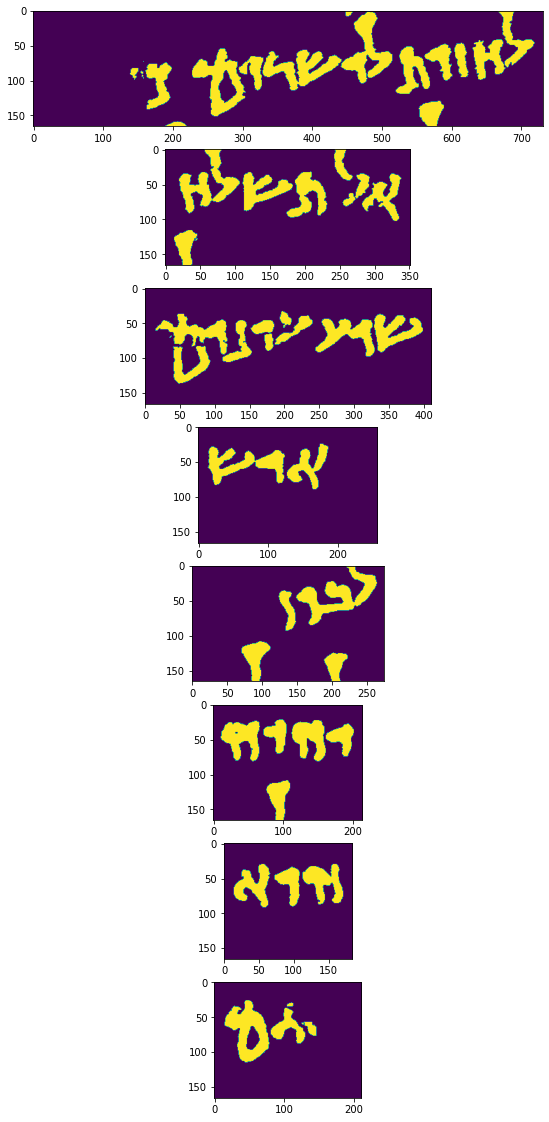

In [53]:
words = [sample_line[:, int(l):int(r)] for l, r in zip(word_seps, word_seps[1:])]

fig, axes = plt.subplots(len(words), 1, figsize=(20, 20))

for ax, word in zip(axes, words):
  ax.imshow(word)
  
plt.show()

In [17]:
gen = nn.Sequential(
  # in: latent_size x 1 x 1

  nn.ConvTranspose2d(64**2, 512, kernel_size=4, stride=1, padding=0, bias=False),
  nn.BatchNorm2d(512),
  nn.ReLU(True),
  # out: 512 x 4 x 4

  nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(256),
  nn.ReLU(True),
  # out: 256 x 8 x 8

  nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(128),
  nn.ReLU(True),
  # out: 128 x 16 x 16

  nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(64),
  nn.ReLU(True),
  # out: 64 x 32 x 32

  nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
  nn.Tanh()
  # out: 1 x 64 x 64
)

gen.load_state_dict(torch.load('./trained/char/generator'))
print(gen)
print(list(gen.named_parameters()))

Sequential(
  (0): ConvTranspose2d(4096, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (13): Tanh()
)
[('0.weight', Parameter containing:
tensor([[[[-5.77

In [27]:
class ReachAround(nn.Sequential):
  
  def __init__(self, *args, structure=None, **kwargs):
    super().__init(*args, **kwargs)
    if structure is None:
      structure = [len(self), 0, 0]
      
    self.structure = structure + [len(self) - sum(structure)]
    
  def forward(self, input):
    start_len, under_len, over_len, end_len = self.structure
    modules = iter(self)
    
    start_input = input
    for _, module in zip(range(start_len), modules):
      start_input = module(start_input)
    
    under_input = start_input
    for _, module in zip(range(under_len), modules):
      under_input = module(under_input)
      
    over_input = start_input
    for _, module in zip(range(over_len), modules):
      over_input = module(over_input)
      
    end_input = torch.matmul(under_input, over_input)
    for _, module in zip(range(end_len), modules):
      end_input = module(end_input)
    
    return end_input
    
model = nn.Sequential(
  # in: latent_size x 1 x 1

  nn.ConvTranspose2d(64**2, 512, kernel_size=4, stride=1, padding=0, bias=False),
  nn.BatchNorm2d(512),
  nn.ReLU(True),
  # out: 512 x 4 x 4

  nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(256),
  nn.ReLU(True),
  # out: 256 x 8 x 8

  nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(128),
  nn.ReLU(True),
  # out: 128 x 16 x 16

  nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
  nn.BatchNorm2d(64),
  nn.ReLU(True),
  # out: 64 x 32 x 32

  nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
  nn.Tanh(),
  # out: 1 x 64 x 64
  
  nn.Flatten()
)

('12.weight', Parameter containing:
tensor([[[[ 1.3683e-01,  1.3444e-01,  7.5029e-02,  1.7676e-01],
          [ 1.5342e-01, -1.5089e-01,  7.8970e-02, -8.5594e-02],
          [-1.5288e-01, -3.3705e-02, -1.3994e-01,  1.4391e-01],
          [-1.5601e-01, -8.8453e-02, -1.3898e-01,  3.0614e-04]]],


        [[[-7.0998e-02, -4.0365e-02, -1.4126e-01, -5.5575e-02],
          [-6.9759e-02, -1.2205e-01, -1.8848e-01, -5.9871e-02],
          [-8.5606e-02, -2.0991e-01, -3.6808e-01, -2.3441e-01],
          [-6.2662e-03, -7.2442e-02, -2.3446e-01, -2.1114e-01]]],


        [[[-7.4177e-02, -6.4139e-02,  4.1664e-02, -3.4716e-03],
          [-9.5274e-02, -9.5370e-02,  1.6923e-01, -4.8960e-03],
          [-1.3664e-01, -2.3054e-01, -7.6301e-02, -1.6931e-01],
          [-4.3599e-02,  3.7544e-02,  7.5144e-02, -1.9448e-02]]],


        ...,


        [[[ 2.5531e-02, -2.6028e-02,  1.4690e-01,  3.1916e-02],
          [ 1.2816e-01,  1.0975e-01,  2.7386e-02, -1.1690e-01],
          [ 2.1663e-01, -1.0693e-01,  3.4